In [ ]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:

file_link = 'https://drive.google.com/file/d/1bCxhq18K5KVFuOPxzrFzupyLPi2Q74aY/view?usp=drive_link'


file_id = file_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(download_link)



In [ ]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
ind = ['India']
df_ind = df[df['location'].isin(ind)]

In [ ]:
df_ind.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
156254,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156255,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156256,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156257,IND,Asia,India,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156258,IND,Asia,India,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156259,IND,Asia,India,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156260,IND,Asia,India,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156261,IND,Asia,India,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156262,IND,Asia,India,2020-01-13,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
156263,IND,Asia,India,2020-01-14,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


In [ ]:
df_ind.drop(df.columns.difference(['date', 'total_vaccinations']), axis=1, inplace=True)

In [ ]:
df_ind.shape

(1561, 2)

In [ ]:
df_ind.head(10)

,date,total_vaccinations
156254,2020-01-05,NaN
156255,2020-01-06,NaN
156256,2020-01-07,NaN
156257,2020-01-08,NaN
156258,2020-01-09,NaN
156259,2020-01-10,NaN
156260,2020-01-11,NaN
156261,2020-01-12,NaN
156262,2020-01-13,NaN
156263,2020-01-14,NaN


In [ ]:
df_ind.tail(10)

,date,total_vaccinations
157805,2024-04-04,2.206866e+09
157806,2024-04-05,2.206866e+09
157807,2024-04-06,2.206866e+09
157808,2024-04-07,2.206866e+09
157809,2024-04-08,2.206866e+09
157810,2024-04-09,2.206866e+09
157811,2024-04-10,2.206866e+09
157812,2024-04-11,2.206866e+09
157813,2024-04-12,2.206866e+09
157814,2024-04-13,2.206866e+09


In [ ]:
print(df_ind['date'].iloc[0])
print(df_ind['date'].iloc[-1])

2020-01-05
2024-04-13


In [ ]:
print(df_ind.columns)


Index(['date', 'total_vaccinations'], dtype='object')


In [ ]:
df_ind.isnull().sum()

date                    0
total_vaccinations    423
dtype: int64

In [ ]:
df_ind.dropna(subset=['total_vaccinations'], inplace=True)

In [ ]:
df_ind.isnull().sum()

date                  0
total_vaccinations    0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Define the columns to impute
num_cols = ['total_vaccinations']

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute the missing values
df_ind[num_cols] = imputer.fit_transform(df_ind[num_cols])


In [ ]:
# Step 1: Convert 'date' column to datetime
df_ind['date'] = pd.to_datetime(df_ind['date'])

# Step 2: Set 'date' column as index
df_ind.set_index('date', inplace=True)

In [ ]:
df_ind = df_ind.drop_duplicates()

In [ ]:
df_ind.tail(10)

,total_vaccinations
date,
2024-04-04,2.206866e+09
2024-04-05,2.206866e+09
2024-04-06,2.206866e+09
2024-04-07,2.206866e+09
2024-04-08,2.206866e+09
2024-04-09,2.206866e+09
2024-04-10,2.206866e+09
2024-04-11,2.206866e+09
2024-04-12,2.206866e+09


In [ ]:
df_ind.shape

(1138, 1)

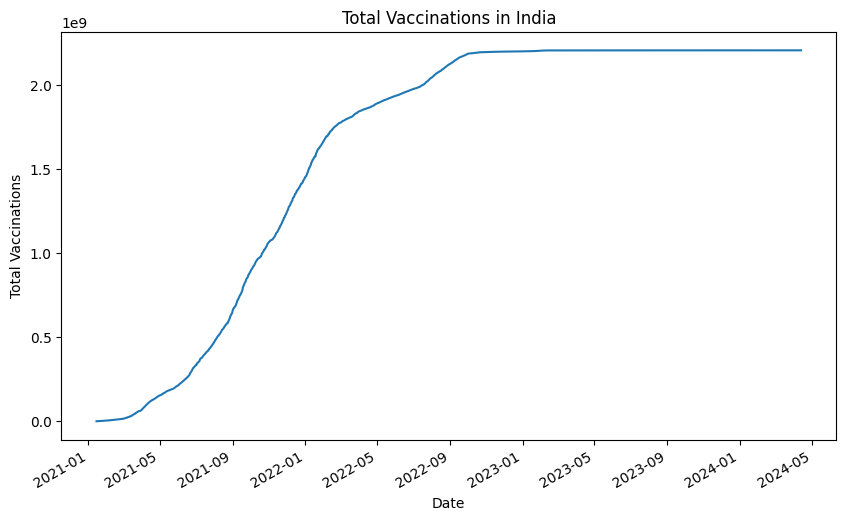

In [ ]:
df_ind['total_vaccinations'].plot(figsize=(10, 6), title='Total Vaccinations in India', kind='line')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select the column for scaling
data_to_scale = df_ind[['total_vaccinations']]


# Standard scaling
standard_scaler = StandardScaler()
scaled_data_standard = standard_scaler.fit_transform(data_to_scale)


scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=['total_vaccinations'], index=df_ind.index)

print("\nStandard Scaled Data:")
print(scaled_df_standard.tail())


Standard Scaled Data:
            total_vaccinations
date                          
2024-04-09            0.738535
2024-04-10            0.738535
2024-04-11            0.738535
2024-04-12            0.738535
2024-04-13            0.738535


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 4.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


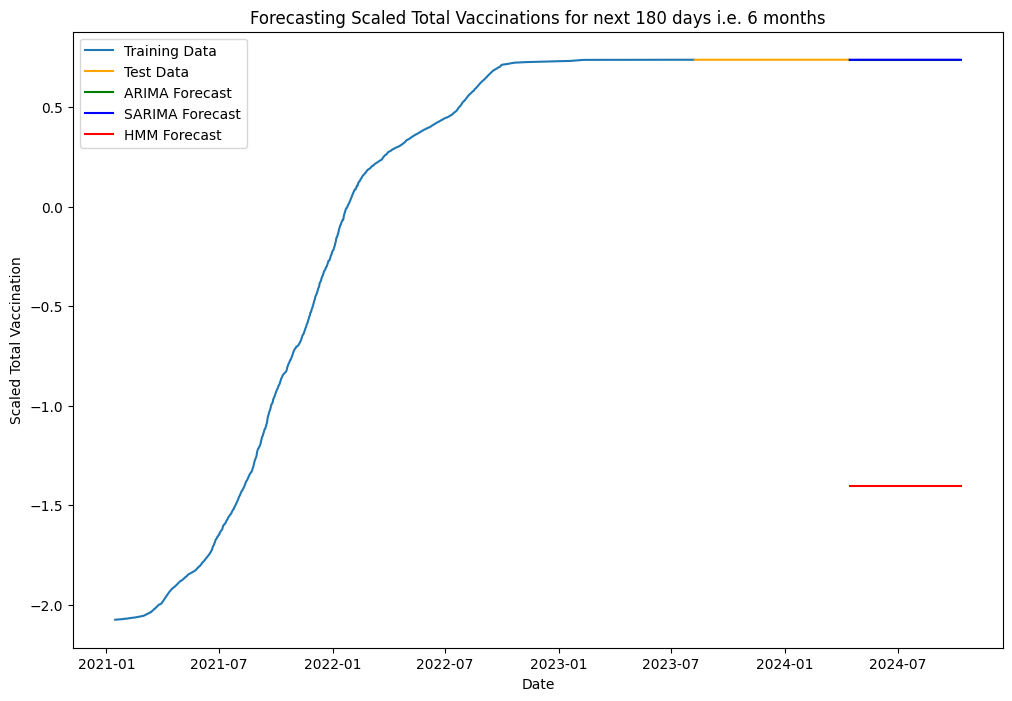

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install hmmlearn

from hmmlearn import hmm


time_series = scaled_df_standard['total_vaccinations']

# Split the Data
train_size = int(len(scaled_df_standard) * 0.8)
train_data = scaled_df_standard.iloc[:train_size]
test_data = scaled_df_standard.iloc[train_size:]


# Train the Models
# ARIMA
arima_model = ARIMA(train_data['total_vaccinations'], order=(5, 1, 0))
arima_fit = arima_model.fit()

# SARIMA
sarima_model = SARIMAX(train_data['total_vaccinations'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# HMM (Hidden Markov Model)
hmm_model = hmm.GaussianHMM(n_components=3)  # Increased number of components to 3
hmm_model.fit(train_data['total_vaccinations'].values.reshape(-1, 1))

# Make Forecasts
last_date = pd.Timestamp('2024-04-13')
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=180, freq='D')

# ARIMA Forecast
arima_forecast = arima_fit.forecast(steps=180)

# SARIMA Forecast
sarima_forecast = sarima_fit.forecast(steps=180)

# HMM Forecast
hmm_forecast = []
current_state = hmm_model.decode(train_data['total_vaccinations'].values.reshape(-1, 1))[1][-1]  # Get the current state
for _ in range(180):
    next_state = hmm_model.predict(np.array(current_state).reshape(1, -1))[0]  # Predict the next state
    next_value = hmm_model.means_[next_state][0]  # Get the mean value of the predicted state
    hmm_forecast.append(next_value)
    current_state = next_state  # Update current state for the next iteration

# Convert forecast to numpy array
hmm_forecast = np.array(hmm_forecast)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting original data
plt.plot(scaled_df_standard.index[:len(train_data)], train_data['total_vaccinations'], label='Training Data')
plt.plot(scaled_df_standard.index[len(train_data):], test_data['total_vaccinations'], label='Test Data', color='orange')

# Plotting forecasts for next 6 months
plt.plot(forecast_dates, arima_forecast, label='ARIMA Forecast', color='green')
plt.plot(forecast_dates, sarima_forecast, label='SARIMA Forecast', color='blue')
plt.plot(forecast_dates, hmm_forecast, label='HMM Forecast', color='red')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Scaled Total Vaccination')
plt.title('Forecasting Scaled Total Vaccinations for next 180 days i.e. 6 months')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Absolute Error (MAE):
ARIMA: 21617.67626073695
SARIMA: 24755.187128631693
HMM: 1647277896.2772615

Mean Squared Error (MSE):
ARIMA: 1561594689.8345723
SARIMA: 856813317.234901
HMM: 2.947435393549975e+18

Root Mean Squared Error (RMSE):
ARIMA: 39517.017724450976
SARIMA: 29271.373682061814
HMM: 1716809655.5966754


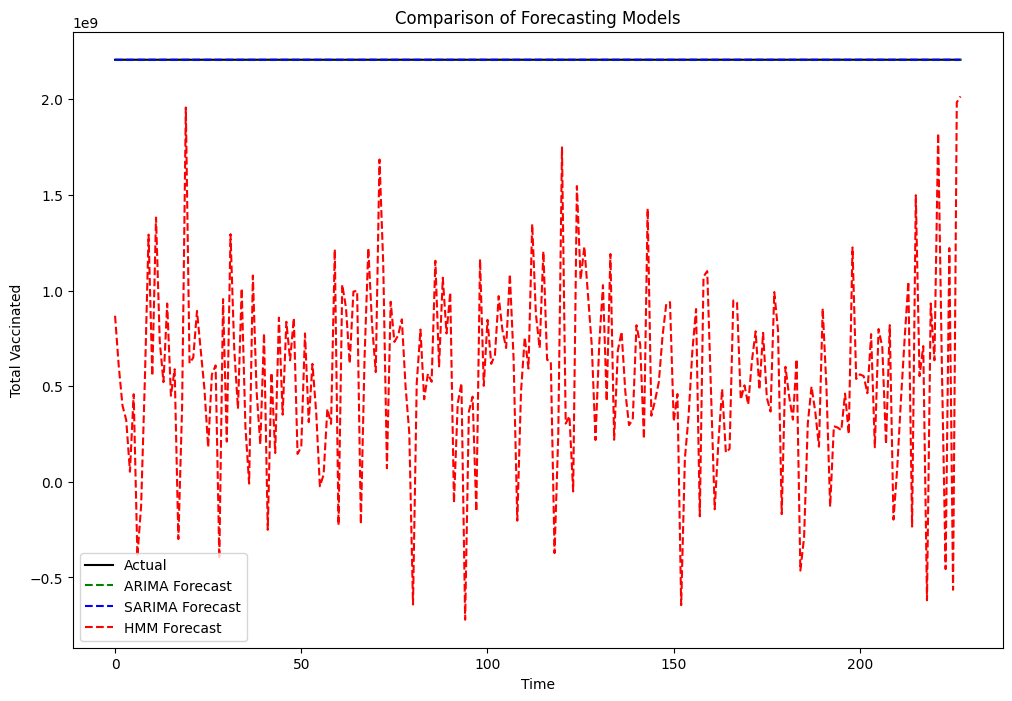

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate forecasts
arima_forecast = arima_fit.forecast(steps=len(test_data))
sarima_forecast = sarima_fit.forecast(steps=len(test_data))
hmm_forecast = hmm_model.sample(len(test_data))[0]

# Convert forecasts to NumPy arrays for reshaping
arima_forecast_arr = np.array(arima_forecast)
sarima_forecast_arr = np.array(sarima_forecast)
hmm_forecast_arr = np.array(hmm_forecast)

# Reshape arrays
arima_forecast_arr = arima_forecast_arr.reshape(-1, 1)
sarima_forecast_arr = sarima_forecast_arr.reshape(-1, 1)
hmm_forecast_arr = hmm_forecast_arr.reshape(-1, 1)

# Inverse scaling for comparison
arima_forecast_inv = standard_scaler.inverse_transform(arima_forecast_arr).flatten()
sarima_forecast_inv = standard_scaler.inverse_transform(sarima_forecast_arr).flatten()
hmm_forecast_inv = standard_scaler.inverse_transform(hmm_forecast_arr).flatten()
test_data_inv = standard_scaler.inverse_transform(test_data['total_vaccinations'].values.reshape(-1, 1)).flatten()


# Calculate metrics
arima_mae = mean_absolute_error(test_data_inv, arima_forecast_inv)
sarima_mae = mean_absolute_error(test_data_inv, sarima_forecast_inv)
hmm_mae = mean_absolute_error(test_data_inv, hmm_forecast_inv)

arima_mse = mean_squared_error(test_data_inv, arima_forecast_inv)
sarima_mse = mean_squared_error(test_data_inv, sarima_forecast_inv)
hmm_mse = mean_squared_error(test_data_inv, hmm_forecast_inv)

arima_rmse = np.sqrt(arima_mse)
sarima_rmse = np.sqrt(sarima_mse)
hmm_rmse = np.sqrt(hmm_mse)

# Print metrics
print("Mean Absolute Error (MAE):")
print("ARIMA:", arima_mae)
print("SARIMA:", sarima_mae)
print("HMM:", hmm_mae)
print("\nMean Squared Error (MSE):")
print("ARIMA:", arima_mse)
print("SARIMA:", sarima_mse)
print("HMM:", hmm_mse)
print("\nRoot Mean Squared Error (RMSE):")
print("ARIMA:", arima_rmse)
print("SARIMA:", sarima_rmse)
print("HMM:", hmm_rmse)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 8))
plt.plot(test_data_inv, label='Actual', color='black')
plt.plot(arima_forecast_inv, label='ARIMA Forecast', color='green', linestyle='--')
plt.plot(sarima_forecast_inv, label='SARIMA Forecast', color='blue', linestyle='--')
plt.plot(hmm_forecast_inv, label='HMM Forecast', color='red', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Total Vaccinated')
plt.title('Comparison of Forecasting Models')
plt.show()
